## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interview/Used Cars Data.csv')
df.head()

,Column1,listing_id,listed_date,city,manufacturer,model,year,color,price,body_type,engine_volume_cc,fuel_consumption,fuel_type,is_new,maximum_seating,mileage,horsepower,transmission,has_accidents,days_on_market
0,0,237132766,4/6/2019,Bayamon,Jeep,Renegade,2019,YELLOW,23141,SUV / Crossover,1300.0,NaN,Gasoline,1,5 seats,7.0,177.0,A,NaN,522
1,1,265946296,2/15/2020,San Juan,Land Rover,Discovery Sport,2020,BLACK,46500,SUV / Crossover,2000.0,NaN,Gasoline,1,7 seats,8.0,246.0,A,NaN,207
2,2,173473508,4/25/2017,Guaynabo,Subaru,WRX STI,2016,UNKNOWN,46995,Sedan,2500.0,20.0,Gasoline,0,5 seats,NaN,305.0,M,0.0,1233
3,3,266911050,2/26/2020,San Juan,Land Rover,Discovery,2020,GRAY,67430,SUV / Crossover,3000.0,NaN,Gasoline,1,7 seats,11.0,340.0,A,NaN,196
4,4,270957414,4/25/2020,San Juan,Land Rover,Discovery Sport,2020,BLACK,48880,SUV / Crossover,2000.0,NaN,Gasoline,1,7 seats,7.0,246.0,A,NaN,137


In [4]:
print(df.columns)

Index(['Column1', 'listing_id', 'listed_date', 'city', 'manufacturer', 'model',
       'year', 'color', 'price', 'body_type', 'engine_volume_cc',
       'fuel_consumption', 'fuel_type', 'is_new', 'maximum_seating', 'mileage',
       'horsepower', 'transmission', 'has_accidents', 'days_on_market'],
      dtype='object')


In [5]:
df.isnull().sum()

Column1                  0
listing_id               0
listed_date              0
city                     0
manufacturer             0
model                    0
year                     0
color                    0
price                    0
body_type             4369
engine_volume_cc     51704
fuel_consumption    163287
fuel_type            24765
is_new                   0
maximum_seating      48149
mileage              50642
horsepower           51704
transmission         16563
has_accidents       463396
days_on_market           0
dtype: int64

## $Q1$

Which company has the most advertising? Among the advertised cars of this company, which model and color are common?

In [6]:
df.groupby('manufacturer')['manufacturer'].count().sort_values(ascending=False)

manufacturer
Ford         156030
Chevrolet    126237
Honda         76758
Toyota        74283
Jeep          64620
              ...  
Eagle             1
Daewoo            1
Pagani            1
Bugatti           1
Geo               1
Name: manufacturer, Length: 80, dtype: int64

In [7]:
df['manufacturer'].value_counts()

Ford         156030
Chevrolet    126237
Honda         76758
Toyota        74283
Jeep          64620
              ...  
Edsel             1
Kaiser            1
Eagle             1
Bugatti           1
Daewoo            1
Name: manufacturer, Length: 80, dtype: int64

In [8]:
df[df['manufacturer'] == 'Ford']['model'].value_counts()

F-150                    36585
Escape                   22824
Explorer                 16808
Fusion                   14424
Edge                     10356
                         ...  
Falcon                       1
Elite                        1
Escape Hybrid Plug-in        1
F-450                        1
Model B                      1
Name: model, Length: 91, dtype: int64

In [9]:
df[df['manufacturer'] == 'Ford']['color'].value_counts()

WHITE      40158
BLACK      30761
RED        18228
SILVER     17687
GRAY       15202
BLUE       14820
UNKNOWN    14165
GREEN       2012
GOLD        1179
BROWN        820
ORANGE       535
YELLOW       397
TEAL          37
PURPLE        27
PINK           2
Name: color, dtype: int64

## $Q2$

Most advertising of car models in the 3 cities with the most advertise

In [10]:
df['city'].value_counts().index[:3]

Index(['Columbus', 'Raleigh', 'Chicago'], dtype='object')

In [11]:
most_ad_city = df['city'].value_counts().index[:3]
df[df['city'].isin(most_ad_city)]['model'].value_counts()

Camry             633
Grand Cherokee    589
Equinox           578
Rogue             534
Corolla           483
                 ... 
L-Series            1
CL-Class            1
Tribute             1
LX 470              1
Borrego             1
Name: model, Length: 694, dtype: int64

## $Q3$

The mean of the advertised cars price

In [12]:
df['price'].mean()

29460.776542160726

## $Q4$

Sort manufacturers based on their car's average price

In [13]:
df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

manufacturer
Pagani     2.195000e+06
Bugatti    1.244996e+06
Spyker     3.055000e+05
McLaren    2.555972e+05
Ferrari    2.349716e+05
               ...     
Mercury    6.055007e+03
Edsel      5.997000e+03
Saturn     4.809793e+03
Isuzu      4.365688e+03
Geo        3.990000e+03
Name: price, Length: 80, dtype: float64

## $Q5$

In [14]:
top3_manufactor = df[df['manufacturer'].isin(df['manufacturer'].value_counts().index[:3])]
top3_manufactor[top3_manufactor['transmission'] == 'A']

,Column1,listing_id,listed_date,city,manufacturer,model,year,color,price,body_type,engine_volume_cc,fuel_consumption,fuel_type,is_new,maximum_seating,mileage,horsepower,transmission,has_accidents,days_on_market
38,38,276675304,7/16/2020,Bay Shore,Chevrolet,Malibu,2018,SILVER,14639,Sedan,1500.0,32.0,Gasoline,0,5 seats,42394.0,160.0,A,0.0,55
41,41,279129180,8/13/2020,Bay Shore,Chevrolet,Traverse,2018,SILVER,23723,SUV / Crossover,3600.0,22.0,Gasoline,0,8 seats,36410.0,310.0,A,0.0,27
45,45,279129181,8/13/2020,Bay Shore,Chevrolet,Traverse,2017,SILVER,22422,SUV / Crossover,3600.0,18.0,Gasoline,0,8 seats,36055.0,281.0,A,1.0,27
54,54,277998707,7/30/2020,Bay Shore,Chevrolet,Traverse,2018,WHITE,23939,SUV / Crossover,3600.0,22.0,Gasoline,0,8 seats,37536.0,310.0,A,0.0,41
60,60,274409090,6/18/2020,Bay Shore,Chevrolet,Traverse,2018,UNKNOWN,26343,SUV / Crossover,3600.0,22.0,Gasoline,0,8 seats,29695.0,310.0,A,0.0,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000211,1000211,281309311,9/4/2020,Groveport,Chevrolet,Trax,2020,GRAY,17782,SUV / Crossover,1400.0,28.0,Gasoline,0,5 seats,20923.0,138.0,A,0.0,6
1000212,1000212,278850210,8/9/2020,Holland,Ford,F-150,2020,UNKNOWN,50610,Pickup Truck,3500.0,20.0,Gasoline,1,6 seats,798.0,375.0,A,NaN,32
1000213,1000213,276813877,7/17/2020,Westerville,Honda,Pilot,2021,GRAY,43940,SUV / Crossover,3500.0,NaN,Gasoline,1,7 seats,6.0,280.0,A,NaN,55
1000218,1000218,281173667,9/3/2020,Washington Court House,Ford,F-150,2020,BLUE,46495,Pickup Truck,3500.0,20.0,Gasoline,1,6 seats,0.0,375.0,A,NaN,7


In [15]:
def car_class(x):
  if x <= 2000:
    return 'A'
  elif x > 2000 and x < 4000:
    return 'B'
  elif x >= 4000:
    return 'C'

In [16]:
top3_manufactor[top3_manufactor['transmission'] == 'A']['engine_volume_cc'].apply(car_class).value_counts()

B    123063
A    104671
C     56729
Name: engine_volume_cc, dtype: int64

Car's classes distribution for each manufacturer

In [17]:
df[(df['manufacturer'].isin(df['manufacturer'].value_counts().index[:3])) & (df['transmission'] == 'A')].groupby('manufacturer').apply(lambda x:x['engine_volume_cc'].apply(car_class).value_counts())

manufacturer   
Chevrolet     A    49114
              C    36120
              B    29542
Ford          B    69594
              A    47346
              C    20609
Honda         B    23927
              A     8211
Name: engine_volume_cc, dtype: int64

## $Q6$

Do engine volumes affect fuel consumption?

In [18]:
df.loc[:,['manufacturer', 'model', 'engine_volume_cc', 'fuel_consumption']]

,manufacturer,model,engine_volume_cc,fuel_consumption
0,Jeep,Renegade,1300.0,NaN
1,Land Rover,Discovery Sport,2000.0,NaN
2,Subaru,WRX STI,2500.0,20.0
3,Land Rover,Discovery,3000.0,NaN
4,Land Rover,Discovery Sport,2000.0,NaN
...,...,...,...,...
1000215,Nissan,Altima,2500.0,34.0
1000216,Chrysler,300,3600.0,22.0
1000217,Ford,Mustang,2300.0,26.0
1000218,Ford,F-150,3500.0,20.0


In [19]:
df[df['fuel_consumption'].isnull() == False].loc[:, ['engine_volume_cc', 'fuel_consumption']]

,engine_volume_cc,fuel_consumption
2,2500.0,20.0
12,3000.0,28.0
38,1500.0,32.0
40,3500.0,21.0
41,3600.0,22.0
...,...,...
1000214,3600.0,15.0
1000215,2500.0,34.0
1000216,3600.0,22.0
1000217,2300.0,26.0


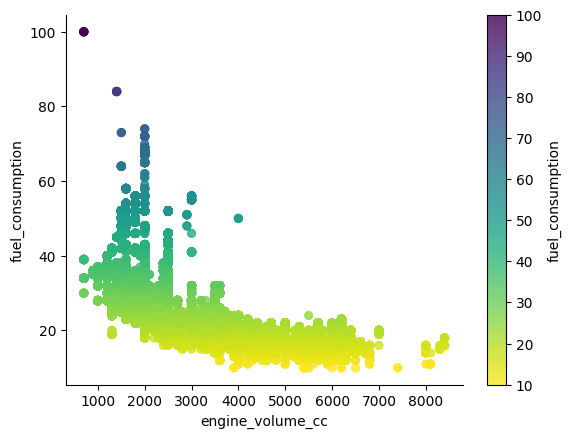

In [20]:
fuel = df[df['fuel_consumption'].isnull() == False].loc[:, ['engine_volume_cc', 'fuel_consumption']]

sn.color_palette("rocket")

fuel.plot(kind='scatter', x='engine_volume_cc', y='fuel_consumption', s=32, alpha=.8, c='fuel_consumption', cmap='viridis_r')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-21-3c18d78cea59>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.iloc[:,2:].corr(), cmap=sn.cubehelix_palette(as_cmap=True), annot=True)


<Axes: >

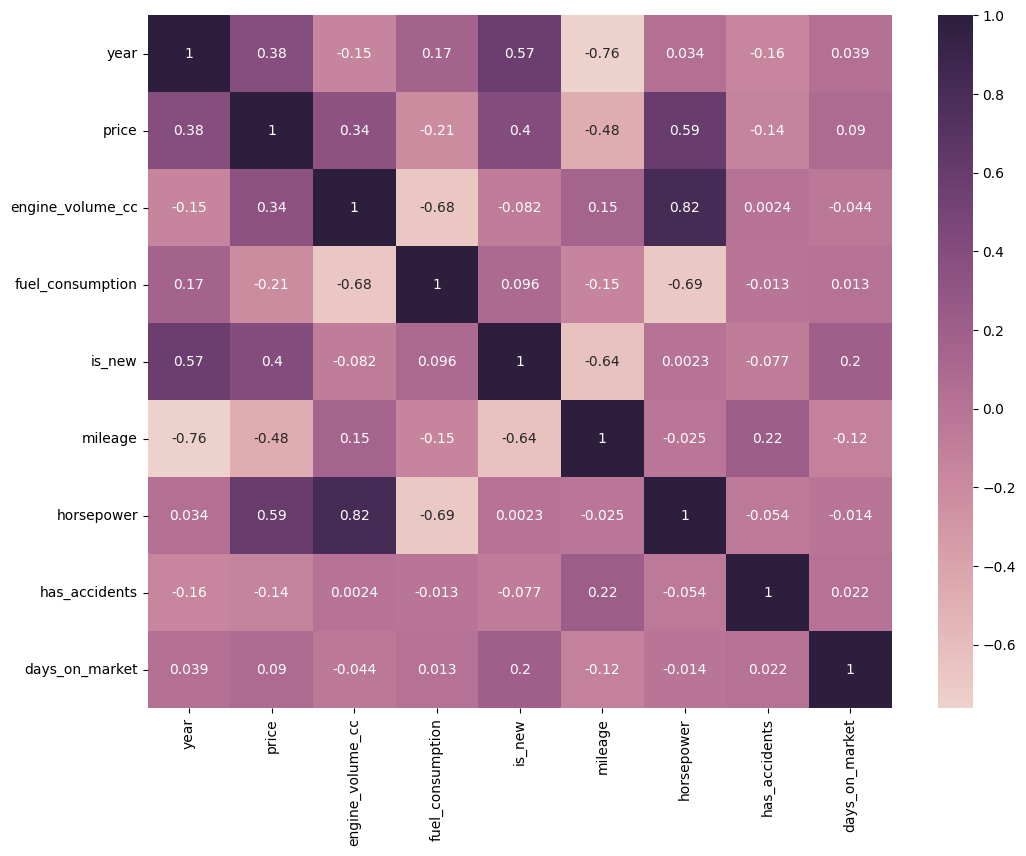

In [21]:
plt.figure(figsize = (12,9))
# cmap = crest, YlGnBu
sn.heatmap(df.iloc[:,2:].corr(), cmap=sn.cubehelix_palette(as_cmap=True), annot=True)

## $Q7$

Which manufacturer has the most advertising of hybrid cars

In [22]:
df['fuel_type'].unique()

array(['Gasoline', 'Diesel', nan, 'Biodiesel', 'Flex Fuel Vehicle',
       'Electric', 'Hybrid', 'Compressed Natural Gas'], dtype=object)

In [23]:
df[df['fuel_type'] == 'Hybrid']['manufacturer'].value_counts()

Toyota           10077
Ford              5304
Honda             3151
Lexus             1676
Kia               1060
Hyundai           1051
Lincoln            464
Acura              119
Chevrolet           89
Subaru              47
Nissan              46
INFINITI            27
Volkswagen          21
Mercury             18
GMC                 16
Cadillac             8
Porsche              8
Audi                 6
BMW                  3
Mercedes-Benz        2
Name: manufacturer, dtype: int64

## $Q8$

What percentage of advertising cars were classified as a new car?

In [24]:
(df[df['is_new'] == 1]['Column1'].count() / df.shape[0]) * 100

47.86426986063066

## $Q9$

Compare cars with more than 2 years old and less than 2

In [25]:
from datetime import datetime

current_year = datetime.now().year

df[current_year - df['year'] > 2]['price'].mean()

29460.776542160726

In [26]:
df[current_year - df['year'] <= 2]

,Column1,listing_id,listed_date,city,manufacturer,model,year,color,price,body_type,engine_volume_cc,fuel_consumption,fuel_type,is_new,maximum_seating,mileage,horsepower,transmission,has_accidents,days_on_market


In [27]:
df['year'].max()

2021

Based on this result, the dataset does not have any advertising car that is less than 2 years old.

In [28]:
df[df['is_new'] == 1]['price'].mean()

37388.24435611219

In [29]:
df[df['is_new'] == 0]['price'].mean()

22182.80311119293

## $Q10$

What percentage of advertised cars had an accident?

In [30]:
(df.loc[df['has_accidents'] == 1.0,:]['Column1'].count() / df.shape[0]) * 100

8.690588070624463

## $Q11$

Which brand of advertised cars sells faster?

In [31]:
df.groupby('manufacturer')['days_on_market'].mean().sort_values(ascending=True)

manufacturer
Edsel           22.00
Opel            24.50
Sunbeam         25.00
Hudson          26.00
Geo             37.00
                ...  
Datsun         413.75
Kaiser         441.00
Spyker         463.00
Willys         537.00
Pininfarina    603.50
Name: days_on_market, Length: 80, dtype: float64

## $Q12$

Based on advertisements, which parameter causes sales much more time?

In [32]:
df.sort_values(by='days_on_market', ascending=False).iloc[:1000,:]

,Column1,listing_id,listed_date,city,manufacturer,model,year,color,price,body_type,engine_volume_cc,fuel_consumption,fuel_type,is_new,maximum_seating,mileage,horsepower,transmission,has_accidents,days_on_market
719796,719796,20498116,11/29/2010,Mifflintown,Chrysler,Prowler,2002,GOLD,49995,Convertible,3500.0,18.0,Gasoline,0,2 seats,580.0,253.0,A,0.0,3573
516698,516698,44361463,9/17/2012,Jersey Shore,Pontiac,Firebird,1982,RED,36995,Hatchback,NaN,NaN,Gasoline,0,NaN,100.0,NaN,A,0.0,2915
731321,731321,55614488,3/21/2013,Shillington,Toyota,Camry Solara,2005,BLUE,9995,Coupe,NaN,NaN,Gasoline,0,NaN,115002.0,NaN,A,0.0,2730
234088,234088,56631937,4/3/2013,Seekonk,Chevrolet,Corvette,1960,UNKNOWN,24000,Coupe,NaN,NaN,NaN,0,NaN,NaN,NaN,M,0.0,2716
256981,256981,58515071,5/1/2013,Gibsonburg,GMC,Sierra 1500,2007,UNKNOWN,9900,Pickup Truck,6000.0,16.0,Gasoline,0,5 seats,225256.0,367.0,A,0.0,2688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976565,976565,201692280,3/14/2018,Fremont,Mitsubishi,Eclipse Cross,2018,RED,22000,SUV / Crossover,1500.0,26.0,Gasoline,0,5 seats,633.0,152.0,A,0.0,911
360530,360530,201902776,3/16/2018,Silver Spring,Mercedes-Benz,GLE-Class,2018,UNKNOWN,62265,SUV / Crossover,3500.0,20.0,Gasoline,1,5 seats,3500.0,302.0,A,0.0,909
918989,918989,201865959,3/16/2018,Asheboro,Jeep,Cherokee,2019,SILVER,24489,SUV / Crossover,2000.0,27.0,Gasoline,1,5 seats,5.0,270.0,A,0.0,909
122550,122550,201829556,3/15/2018,Poughkeepsie,BMW,X1,2017,GRAY,33500,SUV / Crossover,2000.0,26.0,Gasoline,0,5 seats,17280.0,228.0,A,0.0,909


In [33]:
df.sort_values(by='days_on_market', ascending=False).iloc[:1000,:]['manufacturer'].unique()

array(['Chrysler', 'Pontiac', 'Toyota', 'Chevrolet', 'GMC', 'Plymouth',
       'Lincoln', 'Jaguar', 'Bentley', 'Ferrari', 'Mercury', 'Nissan',
       'Ford', 'Dodge', 'Mazda', 'FIAT', 'Hummer', 'Acura', 'Cadillac',
       'Volvo', 'Saturn', 'Lotus', 'Hyundai', 'BMW', 'Mercedes-Benz',
       'Subaru', 'Land Rover', 'Buick', 'Lexus', 'Kia', 'Porsche', 'RAM',
       'Saab', 'Mitsubishi', 'smart', 'Jeep', 'Audi', 'Volkswagen',
       'Honda', 'Rolls-Royce', 'Suzuki', 'Oldsmobile', 'Maserati',
       'Alfa Romeo', 'Genesis', 'Scion', 'McLaren', 'INFINITI',
       'Aston Martin', 'Willys', 'AMC', 'MG', 'Isuzu', 'Pininfarina'],
      dtype=object)

In [34]:
df.sort_values(by='days_on_market', ascending=False).iloc[-1000:,:]['manufacturer'].unique()

array(['Nissan', 'Toyota', 'Lincoln', 'Chevrolet', 'Cadillac', 'Jeep',
       'Ford', 'Kia', 'Chrysler', 'Mercedes-Benz', 'Audi', 'Subaru',
       'Honda', 'Hyundai', 'Mazda', 'Buick', 'RAM', 'GMC', 'BMW', 'Dodge',
       'INFINITI', 'Volkswagen', 'Volvo', 'Lexus', 'Land Rover', 'FIAT',
       'Ferrari', 'Maserati', 'Acura', 'Porsche', 'Pontiac', 'Suzuki',
       'Genesis', 'Mitsubishi', 'Saturn', 'Scion'], dtype=object)

<Axes: xlabel='mileage', ylabel='days_on_market'>

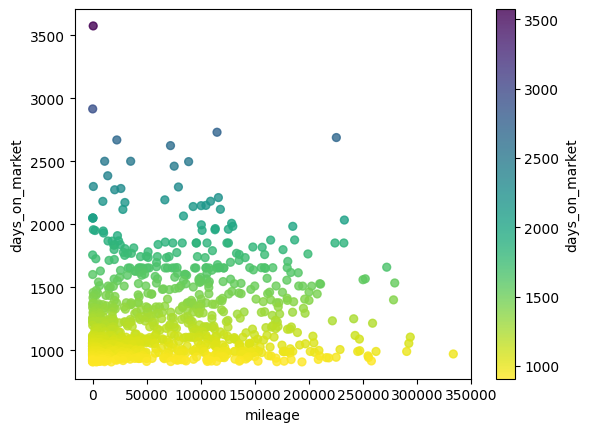

In [35]:
df.sort_values(by='days_on_market', ascending=False).iloc[:1000,:].plot(kind='scatter', x='mileage', y='days_on_market', s=32, alpha=.8, c='days_on_market', cmap='viridis_r')

<Axes: xlabel='mileage', ylabel='days_on_market'>

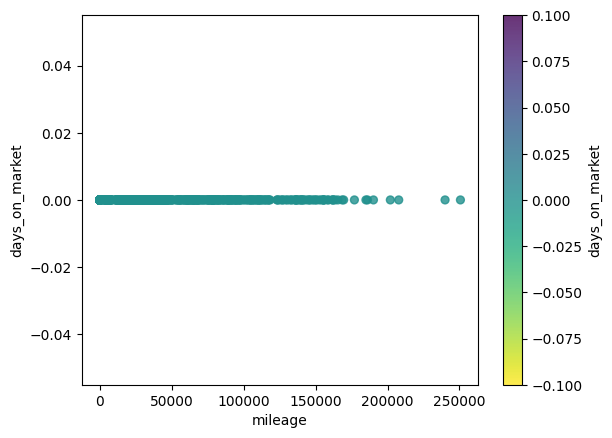

In [36]:
df.sort_values(by='days_on_market', ascending=False).iloc[-1000:,:].plot(kind='scatter', x='mileage', y='days_on_market', s=32, alpha=.8, c='days_on_market', cmap='viridis_r')

<Axes: xlabel='has_accidents', ylabel='days_on_market'>

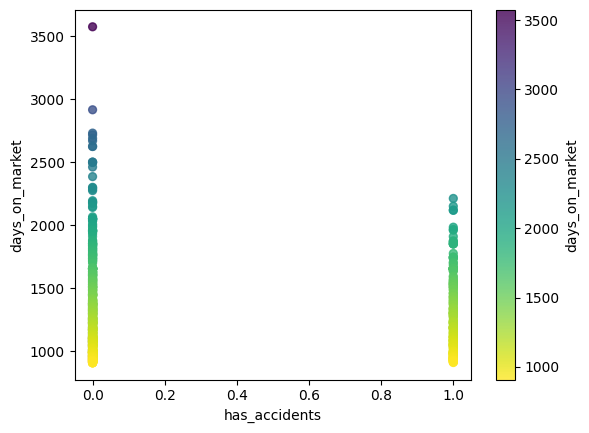

In [37]:
df.sort_values(by='days_on_market', ascending=False).iloc[:1000,:].plot(kind='scatter', x='has_accidents', y='days_on_market', s=32, alpha=.8, c='days_on_market', cmap='viridis_r')

<Axes: xlabel='has_accidents', ylabel='days_on_market'>

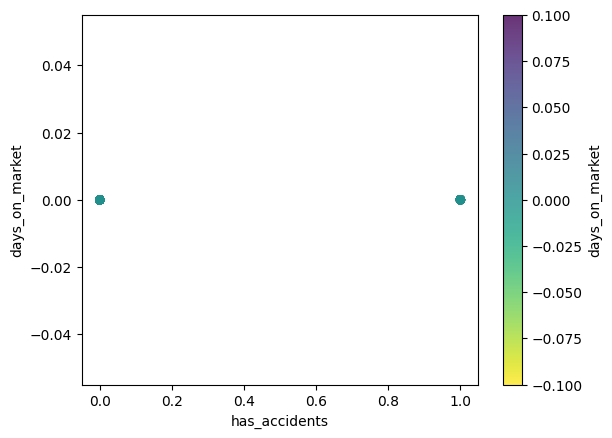

In [38]:
df.sort_values(by='days_on_market', ascending=False).iloc[-1000:,:].plot(kind='scatter', x='has_accidents', y='days_on_market', s=32, alpha=.8, c='days_on_market', cmap='viridis_r')

In [39]:
df.sort_values(by='days_on_market', ascending=False).iloc[:1000,:]['price'].mean()

29465.937

<Axes: ylabel='Frequency'>

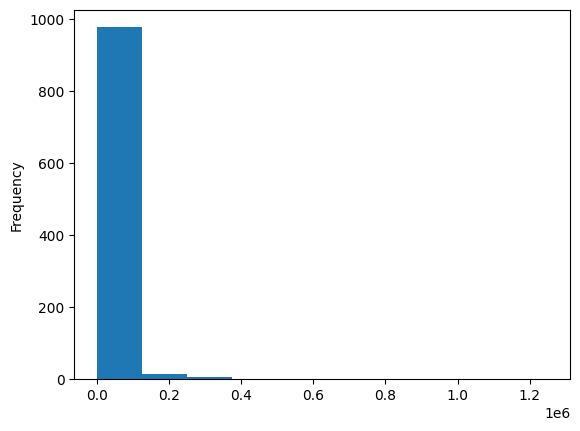

In [40]:
df.sort_values(by='days_on_market', ascending=False).iloc[:1000,:]['price'].plot(kind='hist')

In [41]:
df.sort_values(by='days_on_market', ascending=False).iloc[-1000:,:]['price'].mean()

30714.386

<Axes: ylabel='Frequency'>

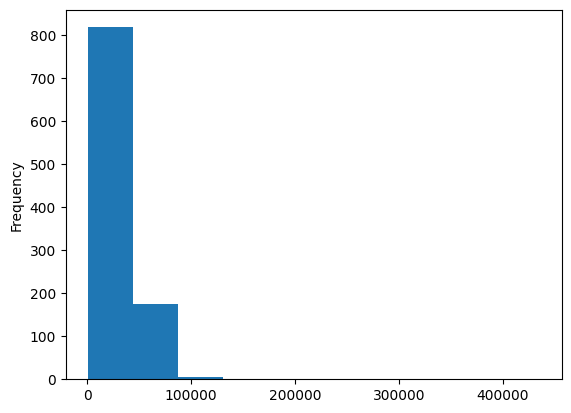

In [42]:
df.sort_values(by='days_on_market', ascending=False).iloc[-1000:,:]['price'].plot(kind='hist')

## $Q13$

Sort the months of the year based on the number of sold cars in each month.

In [43]:
df['listed_date'] = pd.to_datetime(df['listed_date'])

In [44]:
df['listed_date'].dt.month.value_counts()

8     378244
7     180079
9     174236
6      74081
3      39005
2      33117
5      28548
1      24956
12     20515
4      19109
11     15642
10     12688
Name: listed_date, dtype: int64

Text(0.5, 0, 'Number of Advertise')

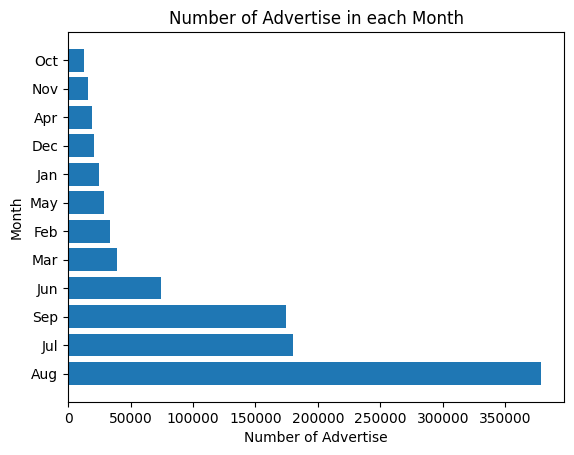

In [45]:
import calendar

month = df['listed_date'].dt.month.value_counts().index.map(lambda x: calendar.month_abbr[x])
value = df['listed_date'].dt.month.value_counts().values

plt.barh(month, value)
plt.title("Number of Advertise in each Month")
plt.ylabel('Month')
plt.xlabel('Number of Advertise')

## $Q14$

3 cities where old cars have been advertised more

In [46]:
df.groupby('city').apply(lambda x:x.sort_values(by='year', ascending=True))

Column1  listing_id listed_date         city manufacturer  \
city                                                                            
Aberdeen    755746   755746   279340368  2020-08-15     Aberdeen       Toyota   
            360487   360487   281624248  2020-09-10     Aberdeen          BMW   
            755716   755716   279626285  2020-08-19     Aberdeen         Jeep   
            755401   755401   264575796  2020-01-31     Aberdeen         Jeep   
            755450   755450   272548540  2020-05-24     Aberdeen         Jeep   
...                     ...         ...         ...          ...          ...   
Zumbrota    180023   180023   281460052  2020-09-06     Zumbrota         Ford   
            163620   163620   272440037  2020-05-23     Zumbrota         Ford   
            182010   182010   213880029  2018-07-26     Zumbrota          RAM   
marietta    179449   179449   281350050  2020-09-05     marietta    Chevrolet   
north hills 154384   154384   274140007  2020-06-16  north hills         Ford   

                                 model  year    color  price        body_type  \
city                                                                            
Aberdeen    755746               Camry  2004  UNKNOWN   6995            Sedan   
            360487                  X3  2005  UNKNOWN   5900  SUV / Crossover   
            755716            Wrangler  2008    GREEN  16500  SUV / Crossover   
            755401  Wrangler Unlimited  2008    GREEN  17000  SUV / Crossover   
            755450  Wrangler Unlimited  2008    GREEN  17200  SUV / Crossover   
...                                ...   ...      ...    ...              ...   
Zumbrota    180023             Mustang  2003   SILVER   6995      Convertible   
            163620               Focus  2017      RED  15000        Hatchback   
            182010           ProMaster  2017    WHITE  54888              Van   
marietta    179449             Equinox  2006   PURPLE   3500  SUV / Crossover   
north hills 154384               F-150  2003    BLACK  11526     Pickup Truck   

                    engine_volume_cc  fuel_consumption          fuel_type  \
city                                                                        
Aberdeen    755746            3300.0              22.0           Gasoline   
            360487            3000.0               NaN           Gasoline   
            755716            3800.0              17.0           Gasoline   
            755401            3800.0              17.0           Gasoline   
            755450            3800.0              17.0           Gasoline   
...                              ...               ...                ...   
Zumbrota    180023            3800.0              21.0           Gasoline   
            163620            2000.0               NaN  Flex Fuel Vehicle   
            182010            3600.0               NaN           Gasoline   
marietta    179449            3400.0              20.0           Gasoline   
north hills 154384            5400.0              13.0           Gasoline   

                    is_new maximum_seating   mileage  horsepower transmission  \
city                                                                            
Aberdeen    755746       0         5 seats  121006.0       225.0            A   
            360487       0         5 seats  185000.0       225.0          NaN   
            755716       0         4 seats  122212.0       202.0            A   
            755401       0         5 seats  104540.0       205.0            M   
            755450       0         5 seats  124385.0       205.0            A   
...                    ...             ...       ...         ...          ...   
Zumbrota    180023       0         4 seats   65000.0       190.0            A   
            163620       0         5 seats   31308.0       160.0            A   
            182010       0         3 seats    2200.0       280.0            A   
marietta    179449 

We should set a year as our measurement for old cars:

In [47]:
df[df['year'] <= 2000].groupby('city').size().sort_values(ascending=False)

city
Grand Rapids    358
Concord         169
Mundelein        91
Pittsburgh       65
Cleveland        65
               ... 
Pearisburg        1
Gowanda           1
Grand Blanc       1
Patchogue         1
Abingdon          1
Length: 1024, dtype: int64

## $Q15$

The brand with the most accident

In [48]:
df.loc[df['has_accidents'] == 1.0,:]['manufacturer'].value_counts()

Ford             10498
Chevrolet         9567
Toyota            8004
Honda             7571
Nissan            6548
Jeep              5149
Hyundai           3682
Dodge             3043
Subaru            3014
Kia               2881
GMC               2572
BMW               2564
Volkswagen        2358
Mercedes-Benz     2273
Lexus             1726
Mazda             1571
Chrysler          1522
Audi              1448
Buick             1326
Cadillac          1311
Acura             1280
RAM               1234
INFINITI          1001
Lincoln            898
Volvo              616
Mitsubishi         440
Land Rover         416
Porsche            339
MINI               300
Pontiac            289
Scion              237
Jaguar             186
Mercury            169
Saturn             161
FIAT               111
Maserati           107
Hummer             103
Saab                52
Suzuki              51
Genesis             49
Tesla               46
Alfa Romeo          45
Bentley             41
smart      

## $Q16$

Can we conclude that cars in the last 10 years have fewer seats than before?

In [49]:
df['maximum_seating'].unique()

array(['5 seats', '7 seats', '2 seats', '4 seats', '8 seats', nan,
       '6 seats', '9 seats', '3 seats', '--', '15 seats', '12 seats',
       '10 seats'], dtype=object)

In [50]:
import re

def find_seat(x):
  find = re.findall(r'\d+\.?\d*', x)
  if find:
    return int(find[0])
  else:
    return 0

In [51]:
df.loc[(df['maximum_seating'].isnull() == False) & (current_year - df['year'] <= 10)]['maximum_seating'].apply(find_seat).value_counts()

5     579082
7      88686
6      77429
8      53900
4      17663
3       9783
2       9588
15      1618
12       509
9        437
10       210
0        150
Name: maximum_seating, dtype: int64

Text(0, 0.5, 'Number of Advertise')

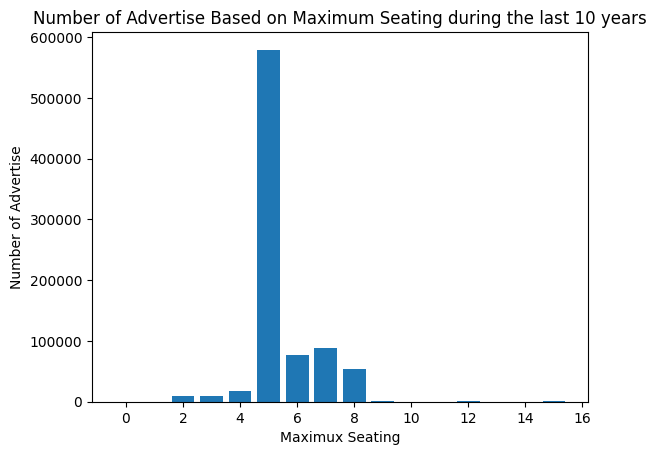

In [52]:
seat = df.loc[(df['maximum_seating'].isnull() == False) & (current_year - df['year'] <= 10)]['maximum_seating'].apply(find_seat).value_counts()
plt.bar(seat.index, seat.values)
plt.title("Number of Advertise Based on Maximum Seating during the last 10 years")
plt.xlabel('Maximux Seating')
plt.ylabel('Number of Advertise')

## $Q17$

Car body type distribution in 5 largest US cities

In [53]:
df['city'].unique()

array(['Bayamon', 'San Juan', 'Guaynabo', ..., 'New Vienna', 'Urbancrest',
       'Cheboygan'], dtype=object)

In [54]:
us_large_cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
df[df['city'].isin(us_large_cities)].groupby('city').apply(lambda x:x['body_type'].value_counts())

city                        
Chicago      SUV / Crossover    4699
             Sedan              2690
             Hatchback           323
             Minivan             301
             Pickup Truck        284
             Van                 207
             Coupe               156
             Wagon               118
             Convertible          47
Houston      SUV / Crossover      82
             Sedan                66
             Pickup Truck         17
             Coupe                11
             Minivan              10
             Convertible           5
             Hatchback             4
             Wagon                 2
             Van                   1
Los Angeles  Sedan                 6
             SUV / Crossover       4
             Hatchback             2
             Coupe                 1
             Wagon                 1
New York     SUV / Crossover     674
             Sedan               271
             Coupe                37
         